In [ ]:
##Importing Dependencies for Project

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
##Importing Dataset into DateFrame

In [5]:
data=pd.read_csv("Advertising.csv", index_col=0, header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
##To display metadata information of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


print(data.shape)
print(data.isnull().sum())

In [4]:
## To display Data Type and Shape of the Dataframe
print(data.dtypes)
print(data.shape)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)


In [5]:
## To display Statistics information of data
print(data.describe())
##newspaper 75% and max value has more deviation therefore it has outliers

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


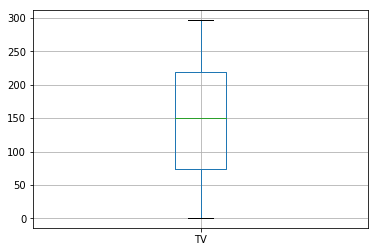

In [6]:
#ASSUMPTION 1
#There should be no outliers in data can be checked use boxplot
##Never run boxplot on discrete variables
#Generate boxplot on continuous numeric variables
data.boxplot(column="TV") #No outliers

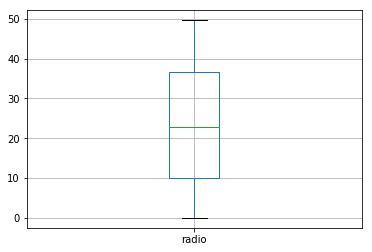

In [7]:
data.boxplot(column="radio") ##No outlier

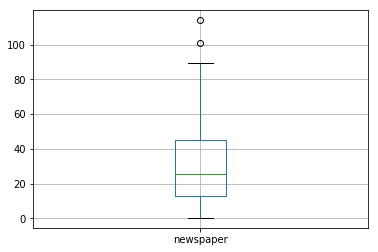

In [9]:
data.boxplot(column="newspaper") ##Has outliers

In [10]:
##Do not impute values detected as outliers in range(cluster of points) 
##Because these could be just far values from the the rest of the values
##Only single points which are extreme can be considered as outliers
##Think logically if it is relevant outlier or not for specific variables

In [11]:
##ASSUMPTION 2
#Assumption of Linearity
#Every independent variable should have a linear relationship with the dependent variable
#can be checked using pairplot

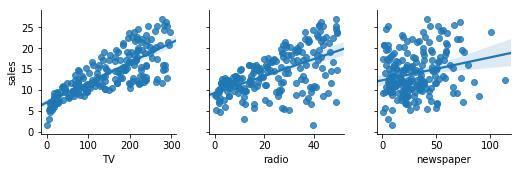

In [8]:
#PairPlot
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",kind="reg")
##TV has strong positive co-relation with the sales
##radio has moderate positive co-relation with the sales
##newspaper has no co-relation with the sales
##Assumption says delete those variables which shows no relationship when u multi-variate data
##in the case we have only 3 variables therefore we are not deleting newspaper for now


In [9]:
#Segregating independent & dependent variable
X=data[["TV","radio","newspaper"]]
Y=data["sales"]

In [14]:
##ASUMPTION3
##Normality

##The dependent variable should follow an approximately normal distribution
#Can be checked by distplot(), gives histogram

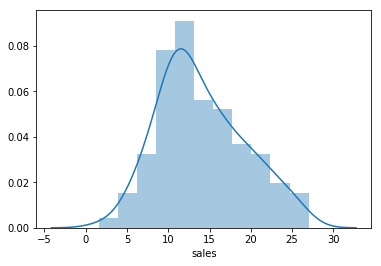

In [15]:
sns.distplot(Y,hist=True) ##We have got approximately normally distributed graph

In [16]:
##if we take square the peak size will be reduced but the peak stil stays
#Perform log transform to smoothen the peak and get normal dist.

In [17]:
""""#log transform
Y_log=np.log(Y)
sns.distplot(Y_log,hist="True")"""
#We donot perform log transform on our data since it increases the skewness 
#only perform transformation to smoothen the peaks , unnecessary transformation increases the skewness of the data which is not required

'"#log transform\nY_log=np.log(Y)\nsns.distplot(Y_log,hist="True")'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002304801D5C0>,
      dtype=object)

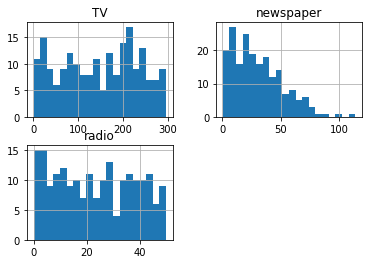

In [18]:
##Checking skewness in independent variable is a good practise
##If found skewness perform log transform
##Donot perform any transformation multiple times 
X.hist(bins=20)
##We get newspaper with high skewness(highly Right skewed)

In [11]:
#Some skewness is acceptable , generic code to handle this is given below
#X.apply applies function to all the variables individually 
##We perform log1p transformation since there might be some values with value 0 and performing normal log transformation 
##can covert these values to negative infinity therefore we we perform log1 transform which converts 0 to 1 
##and then performs log on it
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))
## Finding outlier beyond 0.75 and -0.75 in any variable and is stored in new variable data_num_skewed 
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index]) ##

TV          -0.069328
radio        0.093467
newspaper   -0.793863
dtype: float64
newspaper   -0.793863
dtype: float64


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


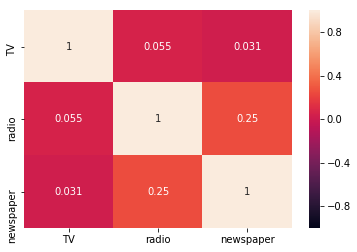

In [20]:
##Assumption of Multicolinearity
#To check multicolinearity among independent variable
corr_df=X.corr(method="pearson")
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True) ##Heatma0p represents the corr in colorfull effect
##

In [12]:
##VIF 
#stasmodel to run statistical model
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.68
1,radio,3.62
2,newspaper,5.94


In [13]:
## sklearn has train-test split function 
from sklearn.model_selection import train_test_split
#Splitting data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=10) ##test_size defines the split ratio
##<1000->0.2
##>1000->0.3

In [14]:
##Creating a model object
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

#Newspaper give us negative coefficient therefore it can be removed

3.389916860805249
[ 0.04373044  0.19280591 -0.13167018]


In [15]:
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.0437304410240576), ('radio', 0.19280590870838593), ('newspaper', -0.13167018358584662)]


In [17]:
X1=100
X2=100 #g44
X3=100 ## make it 0 it increases the predict we can change input values to get max profit

Y_pred=3.3532913858151474+(0.04374250157742166*X1)+(0.1930370789734531*X2)+( -0.048951368222487836*X3)
print(Y_pred)

22.136112618653836


In [ ]:
##Predictions

In [18]:
##Predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)


[18.13321476 12.97823205 18.06954965 23.67244476 20.68931733 14.25691472
 14.92704861 21.39771063 21.14160115 12.77346296 24.00358878  7.20897656
 12.33001346 19.23096474 19.43359699 13.43327126 19.60624633  9.23209635
 21.09765969 20.86684022 15.51146029 10.89955507 22.83705331 15.84268305
 17.40445053  8.18562163 11.87036626 12.70581122 21.70073874  7.9435577
 12.49670252 20.43130025  4.71593916  4.73100513 16.73761425 15.74441253
  6.73900399 17.72150445  9.02030035 13.60076813]


In [ ]:
## Writing Actual and Predicted Values in one Dataframe

In [19]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,1.203616,18.4,18.133215
6,8.7,48.9,1.673489,7.2,12.978232
21,218.4,27.7,1.608710,18.0,18.069550
199,283.6,42.0,1.650133,25.5,23.672445
53,216.4,41.7,1.548364,22.6,20.689317
20,147.3,23.9,1.386474,14.6,14.256915
163,188.4,18.1,1.454166,14.9,14.927049
56,198.9,49.4,1.631370,23.7,21.397711
70,216.8,43.9,1.467718,22.3,21.141601
3,17.2,45.9,1.658756,9.3,12.773463


In [ ]:
## Evaluation

In [20]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8349807940441376
2.5915660600013997
0.8324549898713438


In [21]:
##Comparing the error with range of y  
##
print(min(Y_test))
print(max(Y_test))

1.6
25.5


In [ ]:
##Variable Selection
## Applying Ridge Regression

In [22]:
## sklearn has train-test split function 
from sklearn.model_selection import train_test_split
#Splitting data into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=10) ##test_size defines the split ratio
##<1000->0.2
##>1000->0.3

In [23]:
##Tunning with ridge l2
##Lowers the beta parameter of insignificat variables and reduces its impact
from sklearn.linear_model import Ridge
lm = Ridge()  
lm.fit(X_train,Y_train)
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)
"""
previous values:
3.353291385815151
[ 0.0437425 0.19303708 -0.04895137]
"""

3.374791141649906
[ 0.0437296   0.19276649 -0.12005559]


'\nprevious values:\n3.353291385815151\n[ 0.0437425 0.19303708 -0.04895137]\n'

In [ ]:
## Evaluation of Ridge Model and Predicting values

In [24]:
 ##Predicted values for ridge
Y_pred_new=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred_new)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8350245476084104
2.591222470391179
0.8324994131330289


In [ ]:
## Applying Lasso Regression

In [25]:
##Tunning with Lasso
##Correctly identifies the insignificant value 
from sklearn.linear_model import Lasso
lm = Lasso()  
lm.fit(X_train,Y_train)
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)
"""
previous values:
3.353291385815151
[ 0.0437425 0.19303708 -0.04895137]
"""

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


'\nprevious values:\n3.353291385815151\n[ 0.0437425 0.19303708 -0.04895137]\n'

In [ ]:
## Evaluating Model and Predicting Values

In [26]:
##Predicted values for Lasso
Y_pred_new=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred_new)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8360506658527163
2.5831514271094234
0.8335412372688292


In [27]:
new_df=pd.DataFrame()
new_df=X_train

new_df["sales"]=Y_train
new_df.shape

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(160, 4)

In [ ]:
## Applying OLS model from statsmodel

In [28]:
import statsmodels.formula.api as sm


##default statsmodel has OLS
#Creating a fitted model with all three features
lm_model=sm.ols(formula="sales~TV+radio+newspaper",data=new_df).fit()
##ols gives all statistical outputs


#print the coeeficients
print(lm_model.params)
print(lm_model.summary())
\
##Lower the Aic better is the model
#RMSE is used to evaluate multiple models build using multiple algo.
#Lower the RMSE better is the model
##AIC or BIC are usd to evaluate multiple models built upon different combinations of the data but the same algorithm

##There should be no auto-corellation in the data 
##Can be checked using Durbin Watson check  range(0-4), valueds close to 2->No autocorelation; 0->+ve auto-corr; 4->-ve auto-corr
##Auto-corelation is within the independent data Eg:Time Series

Intercept    3.389917
TV           0.043730
radio        0.192806
newspaper   -0.131670
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.1
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           1.13e-85
Time:                        10:48:05   Log-Likelihood:                -276.66
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [29]:
##Predicted values for Lasso
Y_pred_new=lm_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8349807940441384
2.591566060001394
0.8324549898713446


In [30]:
import statsmodels.formula.api as sm


##default statsmodel has OLS
#Creating a fitted model with all three features
lm_model=sm.ols(formula="sales~TV+radio",data=new_df).fit()
##ols gives all statistical outputs


#print the coeeficients
print(lm_model.params)
print(lm_model.summary())

##AIC NBIC is lower here therefore better model
#adj. r -incresed
#Durbin Watson has reduced

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.47e-87
Time:                        10:49:13   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [31]:
###Repeating the lasso block again n noting the changes


Text(0, 0.5, 'Residuals')

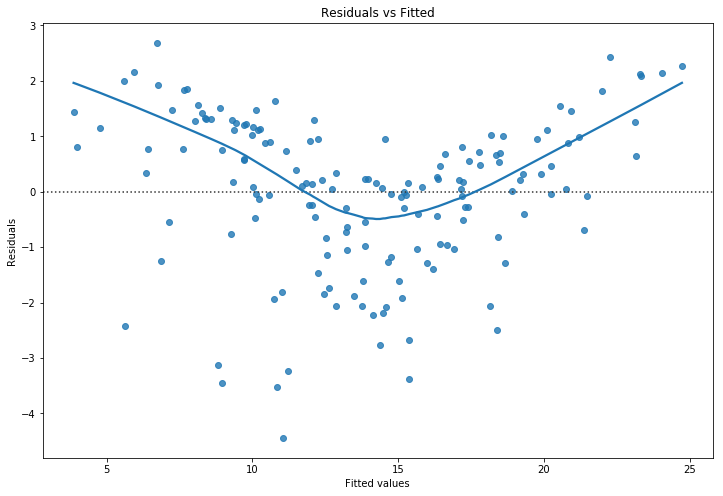

In [32]:
#Diagonostic 
##Errors should be random can be checked fitted vrsus resid plots

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

###Cyclical pattern is not good 

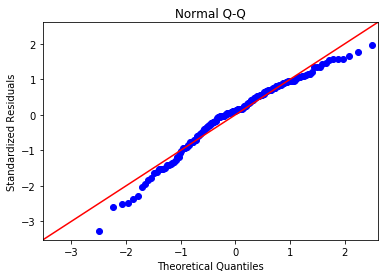

In [33]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

##Errors should follow an approximate normal distribution
##Can be checked using a normal quantile quantile plot
##Blue line should lie 

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

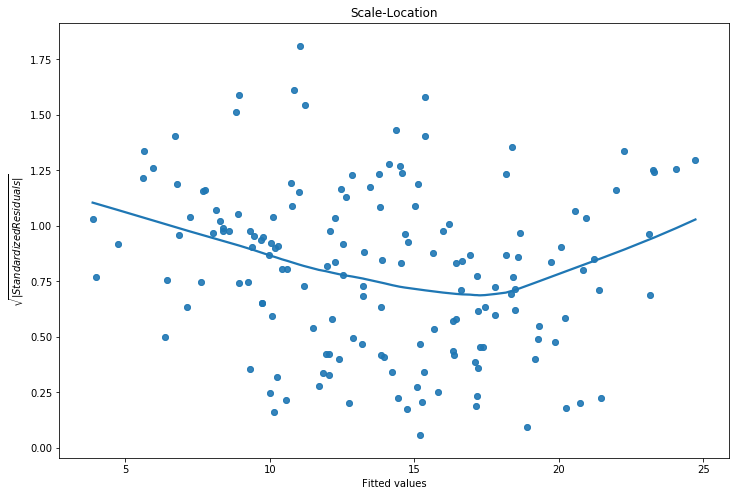

In [34]:
# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')


##Error should follow a constant variances
##values folow constants variance is called homoscedasticity
##values donot folow constants variance is called hetroscedasticity
##Can be checked using scale-location plot
##Variance should not follow steep structure(v-structure, this hetroscedasticity)
##Variance should be constant